#Importing Libraries

In [ ]:
import IPython
import numpy as np
import wave
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
warnings.filterwarnings('ignore')
import soundfile
import librosa
import glob
import librosa.display
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report as adr

#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
Paths = []
Modality=[]
VocalChannel=[]
Emotion=[]
EmotionalIntensity=[]
Statement =[]
Repetition=[]
Actor=[]

for ActorFolderName in os.listdir('/content/gdrive/MyDrive/Prml-Project'):
  Folder='/content/gdrive/MyDrive/Prml-Project/'+ActorFolderName
  for Path in os.listdir(Folder):
    # print(ActorFolderName)
    Paths.append(Folder+'/'+Path)
    labels= Path.split('-')
    Modality.append(int(labels[0]))
    VocalChannel.append(int(labels[1]))
    Emotion.append(int(labels[2]))
    EmotionalIntensity.append(int(labels[3]))
    Statement.append(int(labels[4]))
    Repetition.append(int(labels[5]))
    Actor.append(int(labels[6].split('.')[0]))


In [ ]:
TrainData=pd.DataFrame()
TrainData['Paths']=Paths
TrainData['Actor']=Actor
TrainData['Modality']=Modality
TrainData['VocalChannel']=VocalChannel
TrainData['EmotionalIntensity']=EmotionalIntensity
TrainData['Statement']=Statement
TrainData['Repetition']=Repetition
TrainData['Emotion']=Emotion

In [ ]:
Gender=[]
for genders in TrainData['Actor']:
  if(genders%2==0):
    Gender.append('Female')
  else:
    Gender.append('Male')
TrainData['Gender']=Gender
TrainData

,Paths,Actor,Modality,VocalChannel,EmotionalIntensity,Statement,Repetition,Emotion,Gender
0,/content/gdrive/MyDrive/Prml-Project/Actor_15/...,15,3,1,1,2,2,8,Male
1,/content/gdrive/MyDrive/Prml-Project/Actor_15/...,15,3,1,1,1,2,8,Male
2,/content/gdrive/MyDrive/Prml-Project/Actor_15/...,15,3,1,1,1,1,6,Male
3,/content/gdrive/MyDrive/Prml-Project/Actor_15/...,15,3,1,1,1,2,6,Male
4,/content/gdrive/MyDrive/Prml-Project/Actor_15/...,15,3,1,1,1,1,7,Male
...,...,...,...,...,...,...,...,...,...
1435,/content/gdrive/MyDrive/Prml-Project/Actor_03/...,3,3,1,2,1,2,2,Male
1436,/content/gdrive/MyDrive/Prml-Project/Actor_03/...,3,3,1,1,1,2,7,Male
1437,/content/gdrive/MyDrive/Prml-Project/Actor_03/...,3,3,1,2,2,1,5,Male
1438,/content/gdrive/MyDrive/Prml-Project/Actor_03/...,3,3,1,2,1,1,4,Male


# Visualization

4    192
2    192
7    192
5    192
8    192
6    192
3    192
1     96
Name: Emotion, dtype: int64

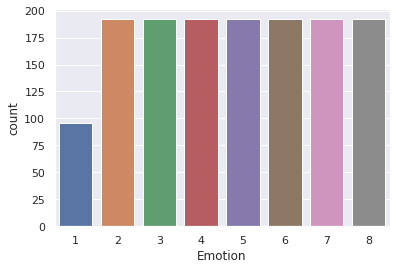

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(TrainData['Emotion'])
TrainData['Emotion'].value_counts()
#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised

1    768
2    672
Name: EmotionalIntensity, dtype: int64

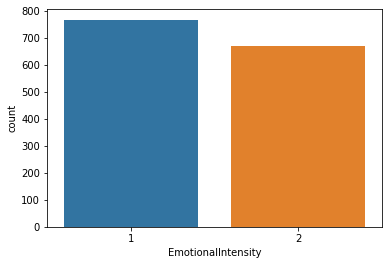

In [ ]:
sns.countplot(TrainData['EmotionalIntensity'])
TrainData['EmotionalIntensity'].value_counts()

1    720
2    720
Name: Statement, dtype: int64

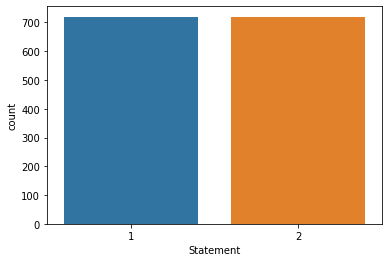

In [ ]:
sns.countplot(TrainData['Statement'])
TrainData['Statement'].value_counts()

1    720
2    720
Name: Repetition, dtype: int64

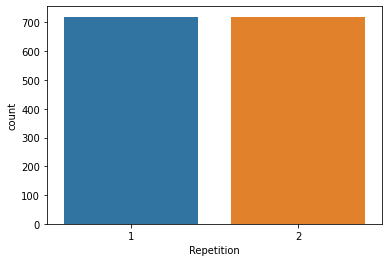

In [ ]:
sns.countplot(TrainData['Repetition'])
TrainData['Repetition'].value_counts()

Male      720
Female    720
Name: Gender, dtype: int64

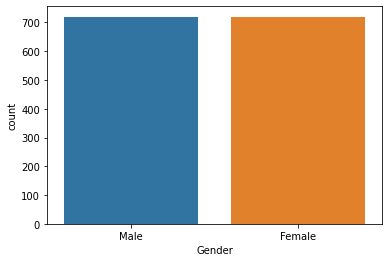

In [ ]:
sns.countplot(TrainData['Gender'])
TrainData['Gender'].value_counts()

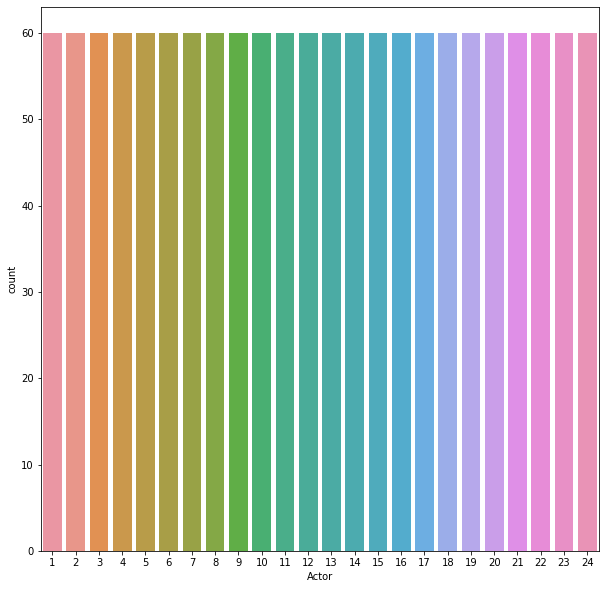

In [ ]:
sns.countplot(TrainData['Actor'])

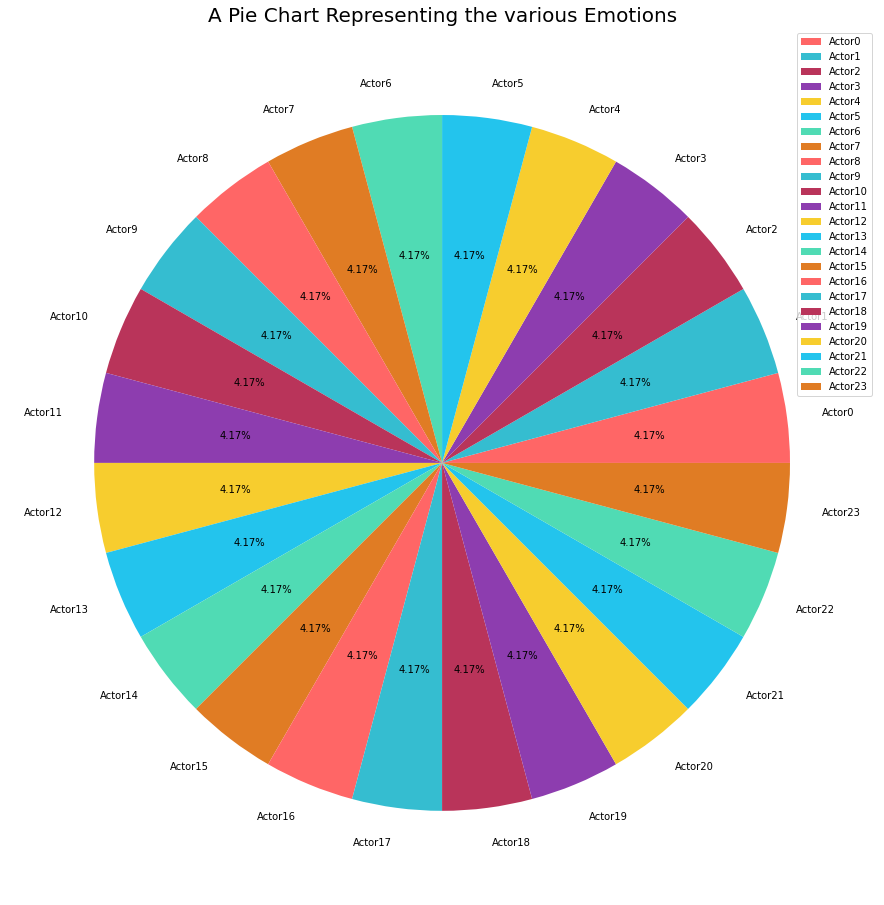

In [ ]:
size = []
labels=[]
for i in range(24):
  size.append(60)
  labels.append('Actor'+str(i))
colors = ['#FF6666', '#35BDD0', '#B9345A',  '#8D3DAF', '#F7CD2E', '#23C4ED', '#50DBB4', '#E07C24']
labels = labels
plt.rcParams['figure.figsize'] = (16, 16)
plt.pie(size, colors = colors, labels = labels,  autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the various Emotions', fontsize = 20)
plt.legend()
plt.show()

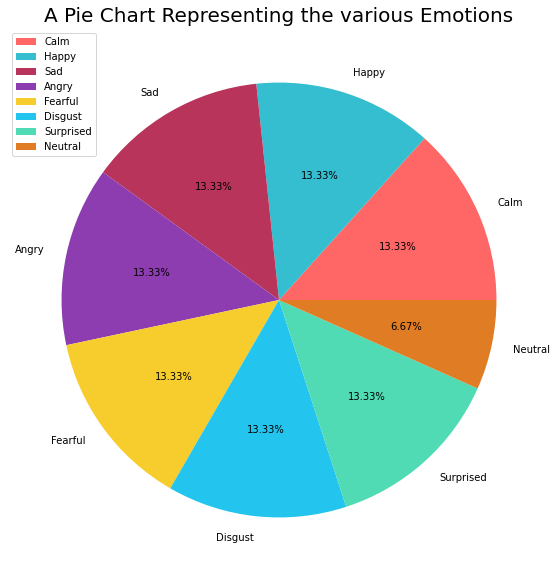

In [ ]:
size = [192,192,192,192,192,192,192,96]
colors = ['#FF6666', '#35BDD0', '#B9345A',  '#8D3DAF', '#F7CD2E', '#23C4ED', '#50DBB4', '#E07C24']
labels = 'Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised','Neutral'
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels,  autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the various Emotions', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
EmotionsDict={1:'Neutral',2:'Calm',3:'Happy',4:'Sad',5:'Angry',6:'Fearful',7:'Disgust',8:'Surprised'}

def Plotgraphs(filename,gender,emotion):

  Data,SamplingRate = librosa.load(filename)
  plt.figure(figsize=(8, 4))

  librosa.display.waveplot(Data, sr=SamplingRate)
  plt.title(EmotionsDict[emotion]+'/'+gender)
  plt.show()
  print( "  ")
  x = librosa.stft(Data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(EmotionsDict[emotion]+'/'+gender)
  librosa.display.specshow(xdb, sr=SamplingRate, x_axis='time', y_axis='hz')
  plt.colorbar()
  plt.show()
  print("   ")

#####Male Sad

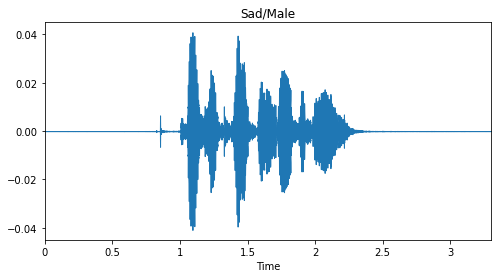

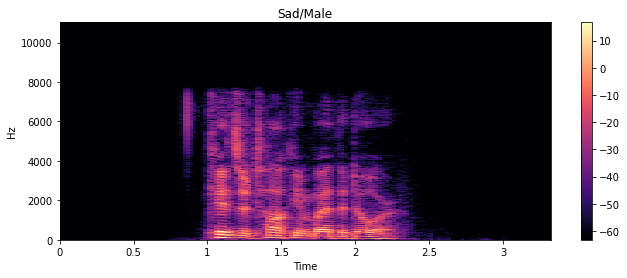

In [ ]:
filename='/content/gdrive/MyDrive/Prml-Project/Actor_01/03-01-01-01-01-01-01.wav'
gender='Male'
Emotion=4
Plotgraphs(filename,gender,Emotion)
IPython.display.Audio(filename)

#####Male Happy

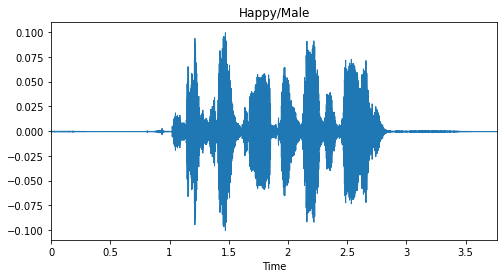

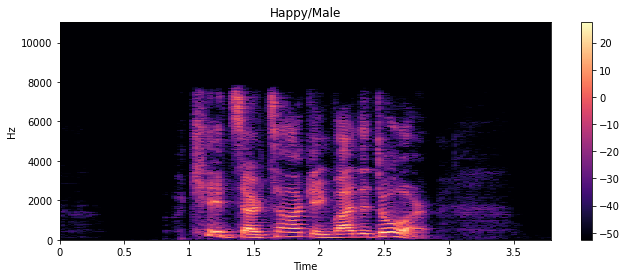

In [ ]:
filename='/content/gdrive/MyDrive/Prml-Project/Actor_03/03-01-03-01-01-01-03.wav'
gender='Male'
Emotion=3
Plotgraphs(filename,gender,Emotion)
IPython.display.Audio(filename)

#####Female Surprised

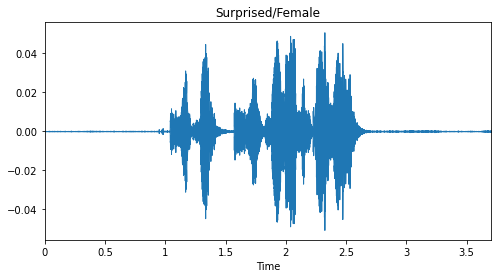

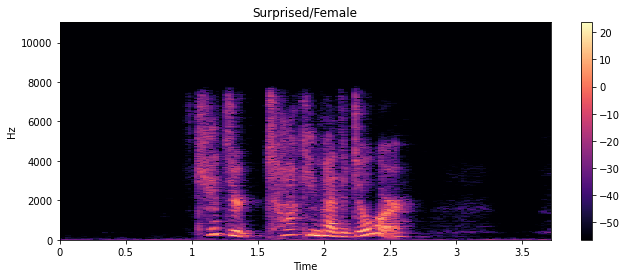

In [ ]:
filename='/content/gdrive/MyDrive/Prml-Project/Actor_08/03-01-08-01-01-01-08.wav'
gender='Female'
Emotion=8
Plotgraphs(filename,gender,Emotion)
IPython.display.Audio(filename)

#####Male Disgust

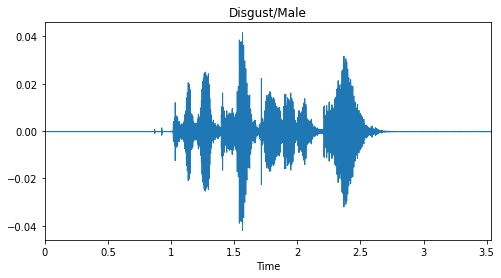

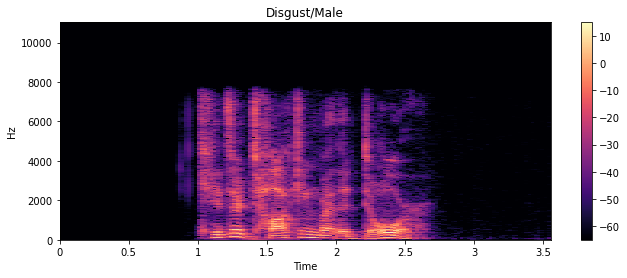

In [ ]:
filename='/content/gdrive/MyDrive/Prml-Project/Actor_07/03-01-07-01-01-01-07.wav'
gender='Male'
Emotion=7
Plotgraphs(filename,gender,Emotion)
IPython.display.Audio(filename)

#####Male Neutral

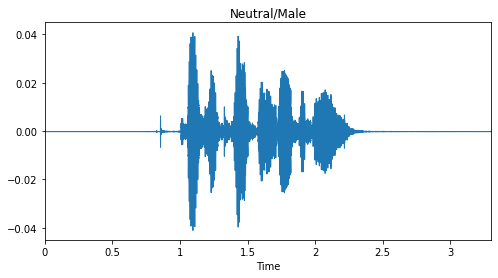

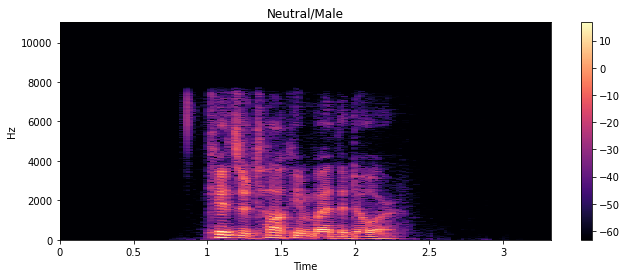

In [ ]:
filename='/content/gdrive/MyDrive/Prml-Project/Actor_01/03-01-01-01-01-01-01.wav'
gender='Male'
Emotion=1
Plotgraphs(filename,gender,Emotion)
IPython.display.Audio(filename)

#####Female Calm

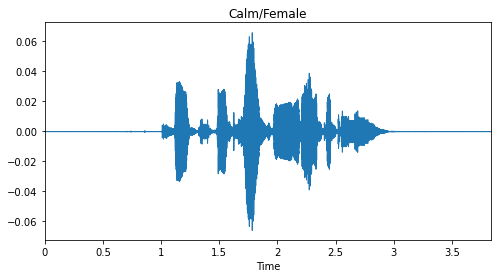

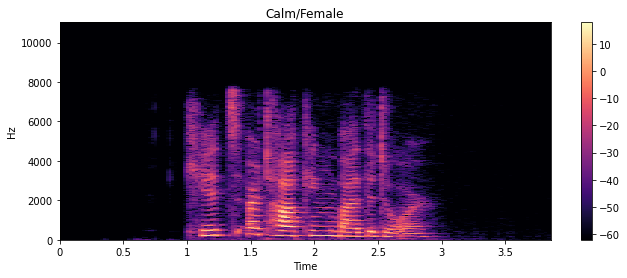

In [ ]:
filename='/content/gdrive/MyDrive/Prml-Project/Actor_02/03-01-02-01-01-01-02.wav'
gender='Female'
Emotion=2
Plotgraphs(filename,gender,Emotion)
IPython.display.Audio(filename)

#####Male Angry

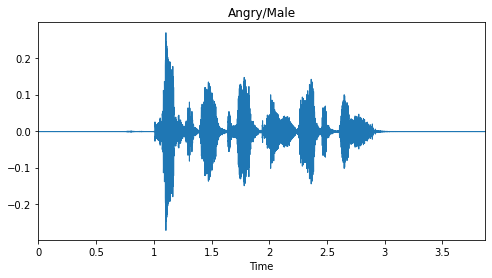

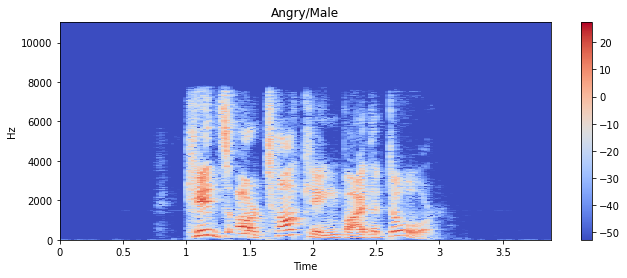

In [ ]:
filename='/content/gdrive/MyDrive/Prml-Project/Actor_05/03-01-05-01-01-01-05.wav'
gender='Male'
Emotion=5
Plotgraphs(filename,gender,Emotion)
IPython.display.Audio(filename)

#####Female Fearful

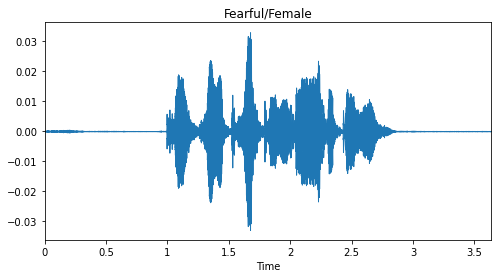

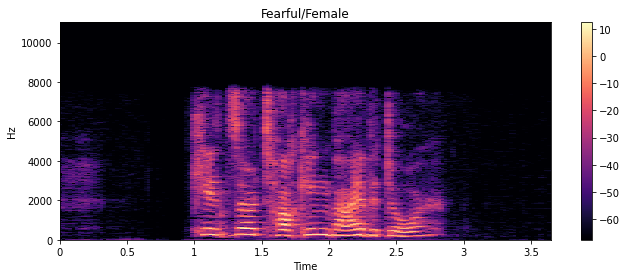

In [ ]:

filename='/content/gdrive/MyDrive/Prml-Project/Actor_06/03-01-06-01-01-01-06.wav'
gender='Female'
Emotion=6
Plotgraphs(filename,gender,Emotion)
IPython.display.Audio(filename)

#Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=128).T, axis=0)
    return mfcc

In [ ]:
feature=[]
for i in range(128):
  feature.append(i)


Xdf = TrainData['Paths'].apply(lambda x: extract_mfcc(x))
Xdf = [x for x in Xdf]
Xdf = np.array(Xdf)
print(Xdf.shape)



(1440, 128)


In [ ]:
Data= pd.DataFrame(Xdf, columns = feature)
Data['label']=TrainData['Emotion']
Data

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,-591.999695,97.226738,-13.074890,26.498436,0.168153,7.522440,-7.766427,-4.018195,-10.116262,2.168727,...,0.159108,0.281579,0.233241,0.268690,0.520812,0.660912,0.239120,-0.181450,-0.170150,8
1,-566.936707,85.348351,-19.199274,23.830524,0.620718,5.085446,-3.227623,0.058050,-7.707880,1.795439,...,0.385765,-0.074308,0.165650,0.270267,0.199502,0.033473,0.201337,-0.105021,-0.045077,8
2,-593.297302,82.627602,-7.131478,27.835999,8.268220,13.455954,-2.518545,3.449748,-2.975821,5.427316,...,0.528829,0.032348,0.290511,0.566912,0.252658,-0.057701,0.237062,-0.066851,0.005978,6
3,-559.119202,85.129143,-17.952641,31.924652,-2.675934,13.277978,-13.155608,-1.401966,-4.600488,5.473710,...,0.328256,0.103024,-0.115206,0.443990,0.315411,0.101733,0.240072,-0.187264,0.267630,6
4,-549.542664,106.996223,-23.971502,28.021616,-2.813231,8.239107,-16.295549,-1.340068,-12.077133,-0.386193,...,0.399726,0.055917,-0.243394,0.287392,0.360487,0.323569,0.215580,-0.241452,0.177515,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-479.705780,95.902916,-37.854931,31.493799,-13.784637,8.848156,-29.746653,-0.311337,-9.610678,-8.264515,...,-0.035792,0.395302,0.788348,0.566684,0.842084,0.631683,0.280517,0.460774,0.282125,2
1436,-542.644226,94.508446,-26.923046,34.464176,-10.508778,5.673616,-21.004997,-1.782256,-12.482045,-3.455137,...,-0.156497,-0.240543,0.359726,0.516613,-0.007657,0.201040,-0.095778,-0.195373,0.220073,7
1437,-291.024445,87.438042,-47.205521,31.778208,-36.561989,10.187867,-20.427092,-8.009513,-12.314721,-8.220976,...,0.051329,0.001554,0.381484,0.623351,0.533980,0.559604,-0.026252,-0.448293,-0.187986,5
1438,-494.713745,83.593430,-31.572435,8.905912,-12.187914,-0.753413,-26.951529,-15.017501,-20.959845,-21.586760,...,-0.207434,0.066728,0.565682,0.207462,0.354307,0.351110,0.266741,0.201871,-0.305015,4


In [ ]:
# Data.to_csv("Dataset.csv")

In [ ]:
ydf=TrainData['Emotion']
y=np.array(ydf)
Y= pd.DataFrame(y, columns = ['label'])
Y

,label
0,8
1,8
2,6
3,6
4,7
...,...
1435,2
1436,7
1437,5
1438,4


#Preprocessing

In [ ]:
Data=pd.read_csv('/content/DatawithAug - AugmentedData.csv')


In [ ]:
Data

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,-591.99970,97.226740,-13.074890,26.498436,0.168153,7.522440,-7.766427,-4.018195,-10.116262,2.168727,...,0.159108,0.281579,0.233241,0.268690,0.520812,0.660912,0.239120,-0.181450,-0.170150,8
1,-566.93670,85.348350,-19.199274,23.830524,0.620718,5.085446,-3.227623,0.058050,-7.707880,1.795439,...,0.385765,-0.074308,0.165650,0.270267,0.199502,0.033473,0.201337,-0.105021,-0.045077,8
2,-593.29730,82.627600,-7.131478,27.835999,8.268220,13.455954,-2.518545,3.449748,-2.975821,5.427316,...,0.528829,0.032348,0.290511,0.566912,0.252658,-0.057701,0.237062,-0.066851,0.005978,6
3,-559.11920,85.129140,-17.952640,31.924652,-2.675934,13.277978,-13.155608,-1.401966,-4.600488,5.473710,...,0.328256,0.103024,-0.115206,0.443990,0.315411,0.101733,0.240072,-0.187264,0.267630,6
4,-549.54266,106.996220,-23.971502,28.021616,-2.813230,8.239107,-16.295550,-1.340068,-12.077133,-0.386193,...,0.399726,0.055917,-0.243394,0.287392,0.360487,0.323569,0.215580,-0.241452,0.177515,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-479.70578,95.902916,-37.854930,31.493800,-13.784637,8.848156,-29.746653,-0.311337,-9.610678,-8.264515,...,-0.035792,0.395302,0.788348,0.566684,0.842084,0.631683,0.280517,0.460774,0.282125,2
1436,-542.64420,94.508446,-26.923046,34.464176,-10.508778,5.673616,-21.004997,-1.782256,-12.482045,-3.455137,...,-0.156497,-0.240543,0.359726,0.516613,-0.007657,0.201040,-0.095778,-0.195373,0.220073,7
1437,-291.02444,87.438040,-47.205520,31.778208,-36.561990,10.187867,-20.427092,-8.009513,-12.314721,-8.220976,...,0.051329,0.001554,0.381484,0.623351,0.533980,0.559604,-0.026252,-0.448293,-0.187986,5
1438,-494.71375,83.593430,-31.572435,8.905912,-12.187914,-0.753413,-26.951529,-15.017501,-20.959845,-21.586760,...,-0.207434,0.066728,0.565682,0.207462,0.354307,0.351110,0.266741,0.201871,-0.305015,4


In [ ]:
X= Data.drop(labels='label',axis=1)
Y=Data.iloc[:,128]
Y

0       8
1       8
2       6
3       6
4       7
       ..
1435    2
1436    7
1437    5
1438    4
1439    1
Name: label, Length: 1440, dtype: int64

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X=scaler.fit_transform(X)
# X

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(1152,)
(288,)
(1152, 128)
(288, 128)


# Training and Predictions

In [ ]:
Accdictionary={'lightgbm':0,'RandomForest':0,'Decison Tree':0,'NaiveByes Classifier':0,"Svc":0,'MLP':0}

##LightGBM

###Initial Model

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report as adr
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))

              precision    recall  f1-score   support

           1       0.38      0.43      0.40        14
           2       0.88      0.53      0.66        53
           3       0.43      0.47      0.45        32
           4       0.45      0.55      0.49        38
           5       0.78      0.74      0.76        39
           6       0.55      0.65      0.59        37
           7       0.50      0.77      0.61        26
           8       0.73      0.55      0.63        49

    accuracy                           0.59       288
   macro avg       0.59      0.59      0.57       288
weighted avg       0.63      0.59      0.60       288



###Parameters Tuning

No handles with labels found to put in legend.


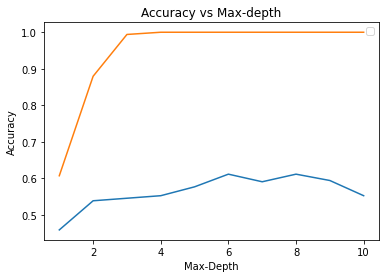

6


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(max_depth=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs Max-depth")
plt.xlabel("Max-Depth")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

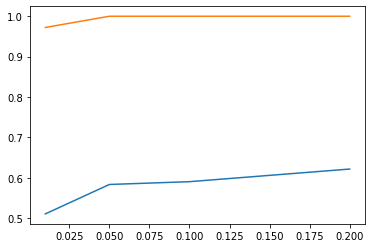

0.2


In [ ]:
L=[0.01,0.05,0.1,0.2]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(learning_rate=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

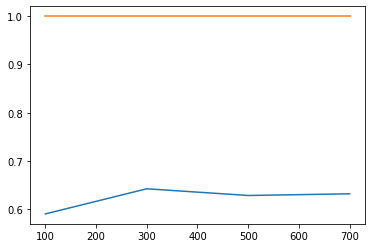

300


In [ ]:
L=[100,300,500,700]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(n_estimators=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

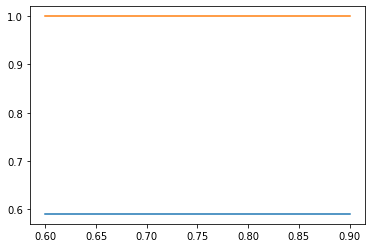

0.6


In [ ]:
L=[0.6,0.7,0.8,0.9]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(subsample=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

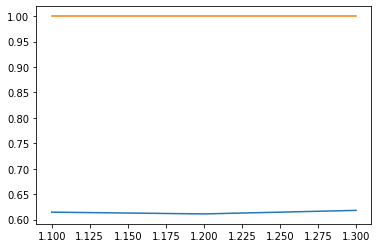

1.3


In [ ]:
L=[1.1, 1.2, 1.3]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(reg_lambda=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

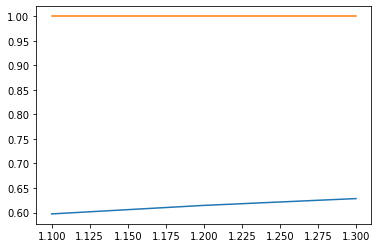

1.3


In [ ]:
L=[1.1, 1.2, 1.3]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(reg_alpha=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

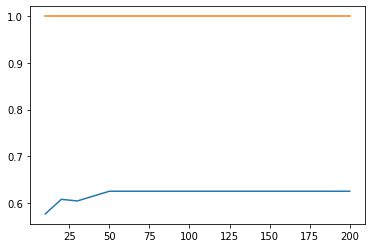

50


In [ ]:
L=[10,20,30,50, 100, 200]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(num_leaves=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

###Final Model

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report as adr
clf = lgb.LGBMClassifier(reg_alpha=1.2,num_leaves=50,reg_lambda=1.2,subsample=0.6,
                         n_estimators=300,learning_rate=0.1,max_depth=7)
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))
Accdictionary['lightgbm']=accuracy_score(ypr,y_test)

              precision    recall  f1-score   support

           1       0.50      0.67      0.57        12
           2       0.94      0.52      0.67        58
           3       0.46      0.53      0.49        30
           4       0.51      0.63      0.56        38
           5       0.78      0.72      0.75        40
           6       0.52      0.64      0.57        36
           7       0.57      0.79      0.67        29
           8       0.73      0.60      0.66        45

    accuracy                           0.62       288
   macro avg       0.63      0.64      0.62       288
weighted avg       0.67      0.62      0.63       288



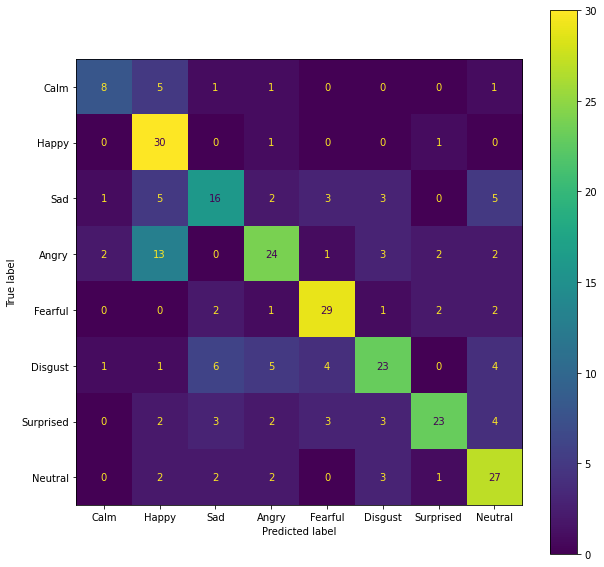

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised','Neutral'],ax=ax)
plt.show()

##Svc

###Initial Model

In [ ]:
from sklearn.svm import SVC
clf= SVC(gamma='auto')
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.53      0.65      0.59        26
           3       0.66      0.37      0.47        62
           4       0.21      0.59      0.31        17
           5       0.92      0.26      0.41       129
           6       0.18      1.00      0.31         8
           7       0.28      0.79      0.41        14
           8       0.51      0.59      0.55        32

    accuracy                           0.42       288
   macro avg       0.41      0.53      0.38       288
weighted avg       0.69      0.42      0.45       288



###Parameter Tuning

No handles with labels found to put in legend.


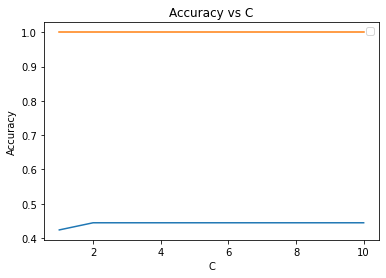

2


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf= SVC(gamma='auto', C=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs C")
plt.xlabel("C")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

No handles with labels found to put in legend.


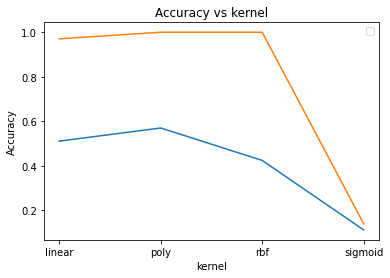

poly


In [ ]:
L=['linear', 'poly', 'rbf', 'sigmoid']
grx=[]
grrx=[]
for i in L:
  clf= SVC(gamma='auto', kernel=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs kernel")
plt.xlabel("kernel")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

No handles with labels found to put in legend.


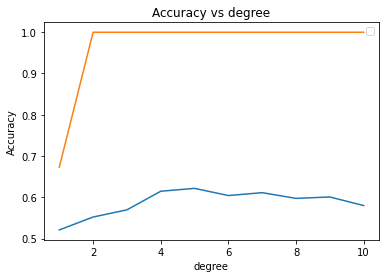

5


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf= SVC(gamma='auto',kernel='poly',degree=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs degree")
plt.xlabel("degree")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

No handles with labels found to put in legend.


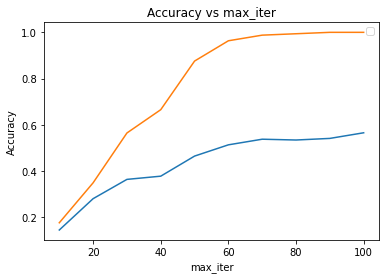

100


In [ ]:
L=[10,20,30,40,50,60,70,80,90,100]
grx=[]
grrx=[]
for i in L:
  clf= SVC(gamma='auto',max_iter=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs max_iter")
plt.xlabel("max_iter")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

###Final Model

In [ ]:
from sklearn.svm import SVC
clf= SVC(gamma='auto',max_iter=80,kernel='rbf',C=4)
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))
Accdictionary['Svc']=accuracy_score(ypr,y_test)

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         8
           2       0.69      0.63      0.66        35
           3       0.40      0.39      0.39        36
           4       0.49      0.53      0.51        43
           5       0.59      0.54      0.56        41
           6       0.64      0.45      0.53        62
           7       0.40      0.67      0.50        24
           8       0.62      0.59      0.61        39

    accuracy                           0.54       288
   macro avg       0.54      0.60      0.55       288
weighted avg       0.56      0.54      0.54       288



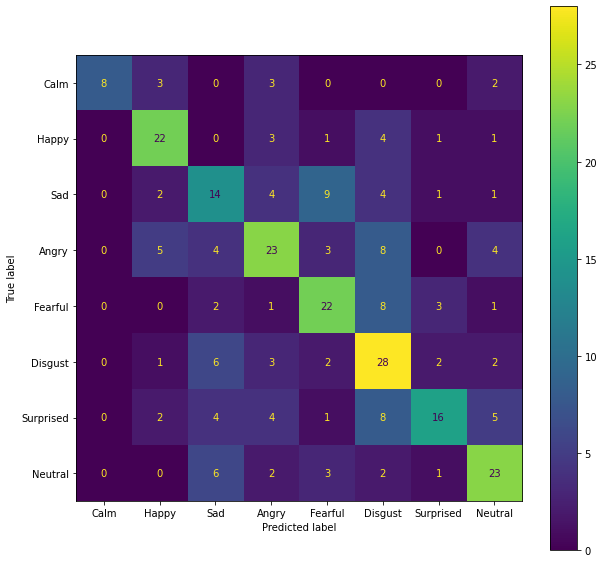

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised','Neutral'],ax=ax)
plt.show()

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))
Accdictionary['NaiveByes Classifier']=accuracy_score(ypr,y_test)

              precision    recall  f1-score   support

           1       0.50      0.25      0.33        32
           2       0.69      0.47      0.56        47
           3       0.20      0.32      0.25        22
           4       0.06      0.33      0.11         9
           5       0.41      0.68      0.51        22
           6       0.59      0.55      0.57        47
           7       0.38      0.38      0.38        39
           8       0.73      0.39      0.50        70

    accuracy                           0.43       288
   macro avg       0.44      0.42      0.40       288
weighted avg       0.54      0.43      0.46       288



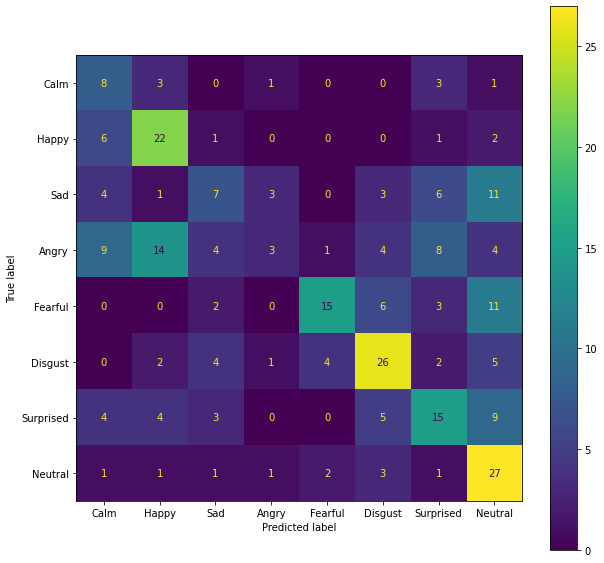

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised','Neutral'],ax=ax)
plt.show()

##RandomForest

###Initial Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=69)
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))

              precision    recall  f1-score   support

           1       0.19      0.60      0.29         5
           2       0.94      0.43      0.59        70
           3       0.34      0.50      0.41        24
           4       0.40      0.59      0.48        32
           5       0.78      0.72      0.75        40
           6       0.59      0.70      0.64        37
           7       0.53      0.66      0.58        32
           8       0.70      0.54      0.61        48

    accuracy                           0.58       288
   macro avg       0.56      0.59      0.54       288
weighted avg       0.66      0.58      0.59       288



###Parameters Tuning

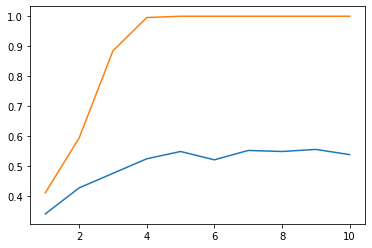

18


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = RandomForestClassifier(max_depth=i*2)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i]*2)
    break

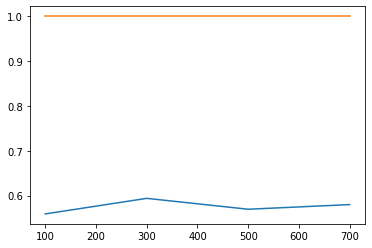

300


In [ ]:
L=[100,300,500,700]
grx=[]
grrx=[]
for i in L:
  clf = RandomForestClassifier(n_estimators=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

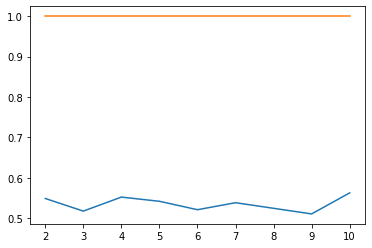

10


In [ ]:
L=[2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = RandomForestClassifier(min_samples_split=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

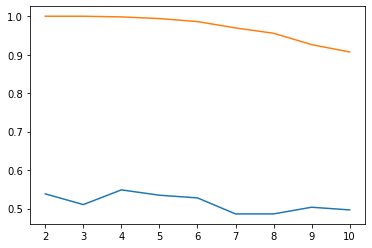

4


In [ ]:
L=[2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = RandomForestClassifier(min_samples_leaf=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

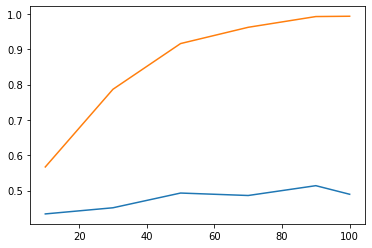

90


In [ ]:
L=[10,30,50,70,90,100]
grx=[]
grrx=[]
for i in L:
  clf = RandomForestClassifier(max_leaf_nodes=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

###Final-Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=69,n_estimators=700,max_depth=18,max_leaf_nodes=90,min_samples_split=3)
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))
Accdictionary['RandomForest']=accuracy_score(ypr,y_test)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      0.38      0.55        84
           3       0.34      0.52      0.41        23
           4       0.30      0.58      0.39        24
           5       0.65      0.73      0.69        33
           6       0.64      0.67      0.65        42
           7       0.50      0.71      0.59        28
           8       0.70      0.49      0.58        53

    accuracy                           0.54       288
   macro avg       0.52      0.51      0.48       288
weighted avg       0.69      0.54      0.56       288



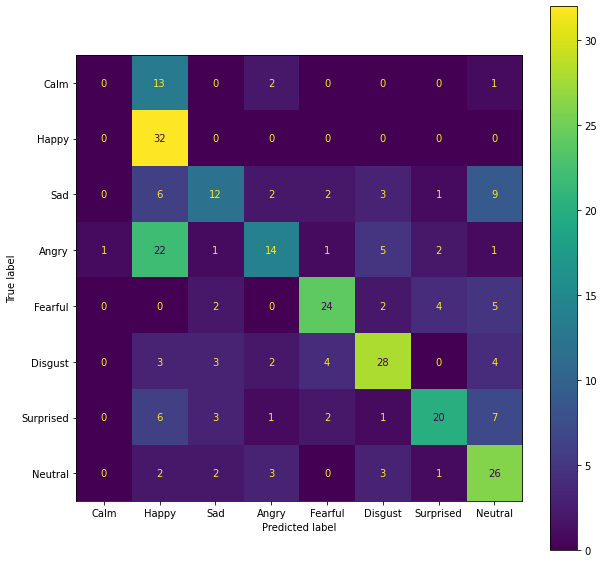

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised','Neutral'],ax=ax)
plt.show()

##DecisonTree

###Initial Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=69)

clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))

              precision    recall  f1-score   support

           1       0.19      0.17      0.18        18
           2       0.44      0.39      0.41        36
           3       0.29      0.25      0.27        40
           4       0.19      0.28      0.23        32
           5       0.54      0.57      0.56        35
           6       0.39      0.52      0.44        33
           7       0.42      0.40      0.41        43
           8       0.43      0.31      0.36        51

    accuracy                           0.37       288
   macro avg       0.36      0.36      0.36       288
weighted avg       0.38      0.37      0.37       288



###Parameter Tuning

No handles with labels found to put in legend.


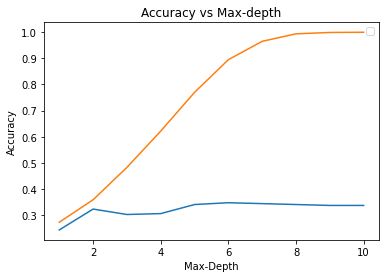

12


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = DecisionTreeClassifier(max_depth=i*2)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs Max-depth")
plt.xlabel("Max-Depth")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i]*2)
    break

No handles with labels found to put in legend.


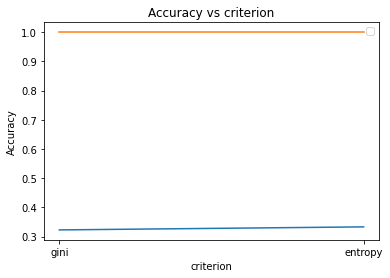

entropy


In [ ]:
L=['gini','entropy']
grx=[]
grrx=[]
for i in L:
  clf = DecisionTreeClassifier(criterion=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs criterion")
plt.xlabel("criterion")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

No handles with labels found to put in legend.


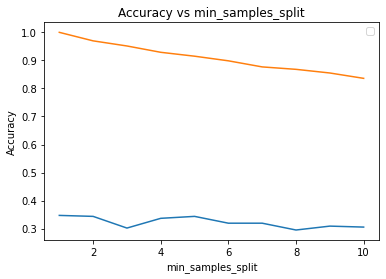

2


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = DecisionTreeClassifier(min_samples_split=i+1)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i]+1)
    break

No handles with labels found to put in legend.


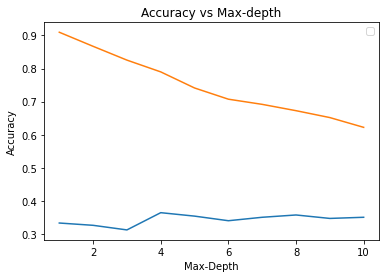

5


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = DecisionTreeClassifier(min_samples_leaf=i+1)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs Max-depth")
plt.xlabel("Max-Depth")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i]+1)
    break

No handles with labels found to put in legend.


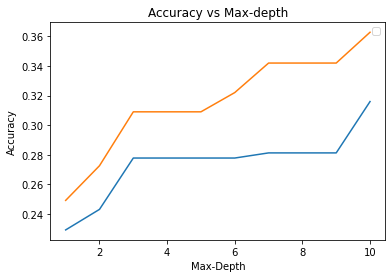

11


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = DecisionTreeClassifier(max_leaf_nodes=i+1)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs Max-depth")
plt.xlabel("Max-Depth")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i]+1)
    break

###Final Model

In [ ]:

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=16,criterion='gini',min_samples_split=8,random_state=69,min_samples_leaf=2,max_leaf_nodes=6)

clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))
Accdictionary['Decison Tree']=accuracy_score(ypr,y_test)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.94      0.24      0.38       127
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.46      0.57      0.51        30
           6       0.00      0.00      0.00         0
           7       0.35      0.29      0.32        48
           8       0.51      0.23      0.32        83

    accuracy                           0.28       288
   macro avg       0.28      0.17      0.19       288
weighted avg       0.67      0.28      0.36       288



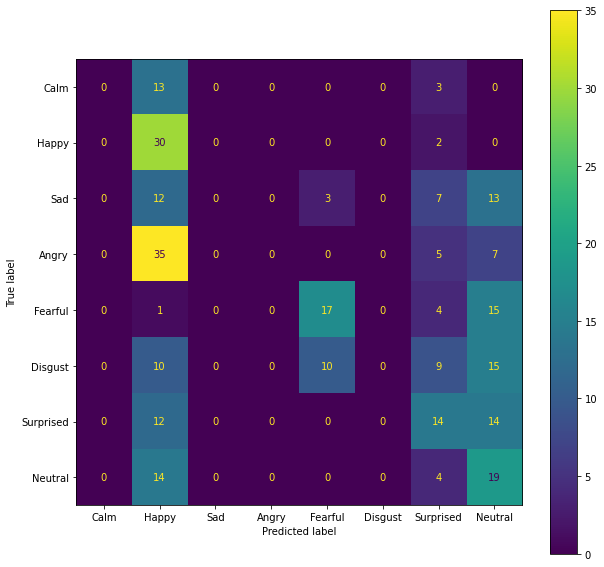

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised','Neutral'],ax=ax)
plt.show()

##MLP Classifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),
                    activation="relu",random_state=1).fit(X_train, y_train)
ypr=clf.predict(X_test)
print(adr(ypr,y_test))
Accdictionary['MLP']=accuracy_score(ypr,y_test)

              precision    recall  f1-score   support

           1       0.31      0.33      0.32        15
           2       0.66      0.70      0.68        30
           3       0.63      0.43      0.51        51
           4       0.51      0.52      0.52        46
           5       0.68      0.78      0.72        32
           6       0.64      0.61      0.62        46
           7       0.45      0.69      0.55        26
           8       0.57      0.50      0.53        42

    accuracy                           0.57       288
   macro avg       0.55      0.57      0.56       288
weighted avg       0.58      0.57      0.57       288



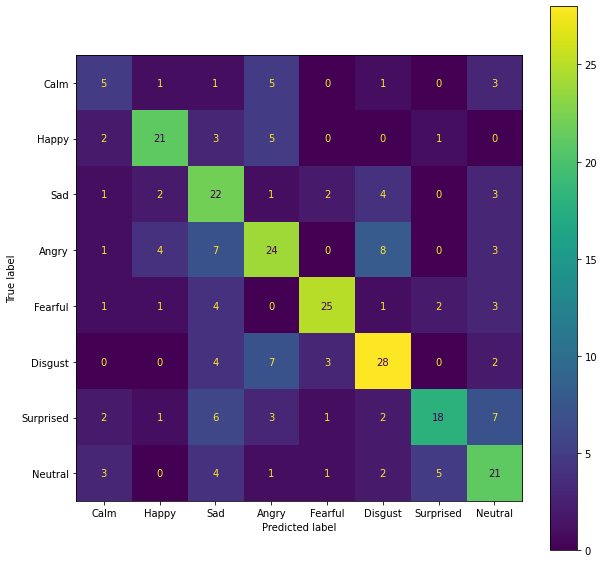

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised','Neutral'],ax=ax)
plt.show()

##LSTM-Model

In [ ]:
XLSTM = [x for x in X]
XLSTM = np.array(X)
XLSTM.shape
XLSTM = np.expand_dims(XLSTM, -1)
XLSTM.shape

(1440, 128, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onc = OneHotEncoder()
Y = onc.fit_transform(Data[['label']])

Y = Y.toarray()
Y.shape


(1440, 8)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(128,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='softmax'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='softmax'),

])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)               

In [ ]:
history = model.fit(X, Y,  batch_size=30,validation_split=0.2, epochs=50)

Epoch 1/50
39/39 [==============================] - 5s 63ms/step - loss: 2.0793 - accuracy: 0.1120 - val_loss: 2.0732 - val_accuracy: 0.1424
Epoch 2/50
39/39 [==============================] - 1s 38ms/step - loss: 2.0737 - accuracy: 0.1328 - val_loss: 2.0706 - val_accuracy: 0.1354
Epoch 3/50
39/39 [==============================] - 1s 38ms/step - loss: 2.0688 - accuracy: 0.1189 - val_loss: 2.0654 - val_accuracy: 0.1354
Epoch 4/50
39/39 [==============================] - 2s 38ms/step - loss: 2.0656 - accuracy: 0.1267 - val_loss: 2.0642 - val_accuracy: 0.1354
Epoch 5/50
39/39 [==============================] - 1s 38ms/step - loss: 2.0630 - accuracy: 0.1345 - val_loss: 2.0634 - val_accuracy: 0.1354
Epoch 6/50
39/39 [==============================] - 2s 39ms/step - loss: 2.0646 - accuracy: 0.1337 - val_loss: 2.0637 - val_accuracy: 0.1285
Epoch 7/50
39/39 [==============================] - 1s 38ms/step - loss: 2.0639 - accuracy: 0.1059 - val_loss: 2.0638 - val_accuracy: 0.1285
Epoch 8/50
39

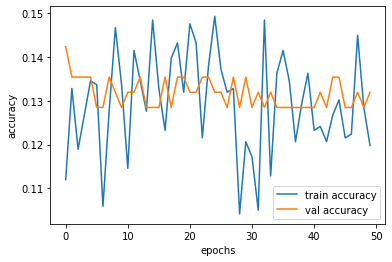

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#Comparison B/W Models

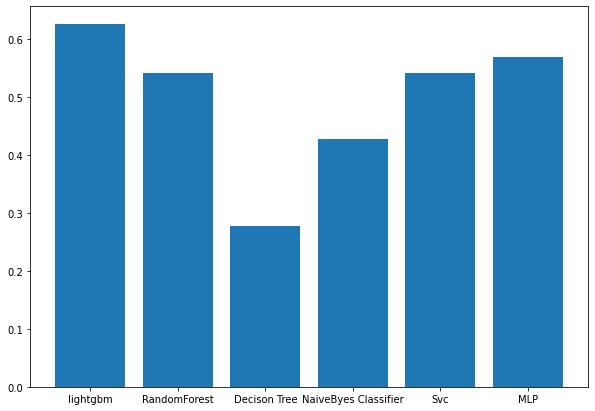

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(Accdictionary)), list(Accdictionary.values()), align='center')
plt.xticks(range(len(Accdictionary)), list(Accdictionary.keys()))
plt.show()

# Data Augmentation

In [ ]:
import wave
def noise(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

In [ ]:
from scipy.io import wavfile
X_noise=[]
for i in TrainData['Paths']:
  Wave1 = wave.open(i)
  FrameRate = Wave1.getframerate()
  SignalRaw1 = Wave1.readframes(-1)
  signal1 = np.fromstring(SignalRaw1, 'int16')
  aug=noise(signal1,7)
  rt = np.int16(aug)
  wavfile.write("noise.wav", FrameRate, rt)
  X_noise.append(extract_mfcc('/content/noise.wav'))

len(X_noise)

1440

In [ ]:
X_aug=np.concatenate((Xdf, X_noise), axis=0)


In [ ]:
ylabel=TrainData['Emotion'].values
y_aug=np.concatenate((ylabel, ylabel), axis=0)
len(y_aug)

2880

In [ ]:
X_augmented=pd.DataFrame(X_aug)
X_augmented['Emotion']=y_aug
X_augmented

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Emotion
0,-591.999695,97.226738,-13.074890,26.498436,0.168153,7.522440,-7.766427,-4.018195,-10.116262,2.168727,...,0.159108,0.281579,0.233241,0.268690,0.520812,0.660912,0.239120,-0.181450,-0.170150,8
1,-566.936707,85.348351,-19.199274,23.830524,0.620718,5.085446,-3.227623,0.058050,-7.707880,1.795439,...,0.385765,-0.074308,0.165650,0.270267,0.199502,0.033473,0.201337,-0.105021,-0.045077,8
2,-593.297302,82.627602,-7.131478,27.835999,8.268220,13.455954,-2.518545,3.449748,-2.975821,5.427316,...,0.528829,0.032348,0.290511,0.566912,0.252658,-0.057701,0.237062,-0.066851,0.005978,6
3,-559.119202,85.129143,-17.952641,31.924652,-2.675934,13.277978,-13.155608,-1.401966,-4.600488,5.473710,...,0.328256,0.103024,-0.115206,0.443990,0.315411,0.101733,0.240072,-0.187264,0.267630,6
4,-549.542664,106.996223,-23.971502,28.021616,-2.813231,8.239107,-16.295549,-1.340068,-12.077133,-0.386193,...,0.399726,0.055917,-0.243394,0.287392,0.360487,0.323569,0.215580,-0.241452,0.177515,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,-453.965790,91.745415,-39.894745,36.647823,-21.068243,14.244286,-32.586529,3.861790,-10.345208,-7.039271,...,0.165256,0.190999,0.756047,0.447302,1.008440,0.555428,0.510311,0.319044,0.415952,2
2876,-501.639252,88.060677,-30.899935,42.490799,-21.082418,14.636322,-25.794611,4.013403,-14.473302,-2.273079,...,-0.034741,-0.302414,0.694598,0.142934,0.363698,0.083978,0.099499,-0.148226,0.304367,7
2877,-289.842834,87.416031,-47.371761,31.933512,-36.819626,10.358295,-20.621786,-7.766386,-12.326772,-8.314155,...,0.023671,-0.031752,0.360324,0.634872,0.557847,0.604567,-0.058728,-0.454563,-0.148066,5
2878,-468.166901,82.035034,-34.558647,14.564117,-17.411415,4.268723,-29.280281,-11.634407,-21.476597,-19.433500,...,-0.273838,0.068681,0.458595,0.283074,0.322609,0.412686,0.138686,0.026199,-0.336503,4


In [ ]:
# X_augmented.to_csv("DataAugmented_N7.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X_augmented)
X

array([[-0.65726352,  1.37925535,  1.25165596, ..., -0.63982077,
        -0.65199996,  1.50219138],
       [-0.38955261,  0.63750761,  0.82055289, ..., -0.3361739 ,
        -0.18323818,  1.50219138],
       [-0.67112395,  0.46761002,  1.67002017, ..., -0.18453176,
         0.00811135,  0.58248237],
       ...,
       [ 2.57023228,  0.76662423, -1.16254384, ..., -1.72486673,
        -0.56922934,  0.12262787],
       [ 0.66545946,  0.43060705, -0.26061265, ...,  0.18514897,
        -1.27547151, -0.33722664],
       [ 0.00737059, -0.07825817,  0.18315831, ..., -0.8988483 ,
         0.01864309, -1.71679015]])

#Preprocessing of Augmented Data

In [ ]:
Data=pd.read_csv('/content/Data_Aug_noise_7 - DataAugmented_N7.csv')


In [ ]:
Data

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Emotion
0,-591.99970,97.22674,-13.074890,26.498436,0.168153,7.522440,-7.766427,-4.018195,-10.116262,2.168727,...,0.159108,0.281579,0.233241,0.268690,0.520812,0.660912,0.239120,-0.181450,-0.170150,8
1,-566.93670,85.34835,-19.199274,23.830524,0.620718,5.085446,-3.227623,0.058050,-7.707880,1.795439,...,0.385765,-0.074308,0.165650,0.270267,0.199502,0.033473,0.201337,-0.105021,-0.045077,8
2,-593.29730,82.62760,-7.131478,27.835999,8.268220,13.455954,-2.518545,3.449748,-2.975821,5.427316,...,0.528829,0.032348,0.290511,0.566912,0.252658,-0.057701,0.237062,-0.066851,0.005978,6
3,-559.11920,85.12914,-17.952640,31.924652,-2.675934,13.277978,-13.155608,-1.401966,-4.600488,5.473710,...,0.328256,0.103024,-0.115206,0.443990,0.315411,0.101733,0.240072,-0.187264,0.267630,6
4,-549.54266,106.99622,-23.971502,28.021616,-2.813230,8.239107,-16.295550,-1.340068,-12.077133,-0.386193,...,0.399726,0.055917,-0.243394,0.287392,0.360487,0.323569,0.215580,-0.241452,0.177515,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,-453.84958,91.78077,-39.607120,37.035280,-21.045444,14.287588,-32.954500,3.576499,-10.238209,-6.912404,...,0.025720,0.418451,1.015569,0.520788,0.883906,0.471730,0.360052,0.420279,0.386317,2
2876,-501.40720,88.55906,-30.801828,42.087260,-21.086494,14.789273,-26.204065,3.767060,-14.032688,-2.207757,...,-0.081640,-0.335634,0.509522,0.067360,0.316796,0.046767,0.194026,-0.275810,0.210752,7
2877,-289.78613,87.49333,-47.335976,31.964360,-36.799732,10.332217,-20.624277,-7.797048,-12.274536,-8.198750,...,0.049862,0.009176,0.302360,0.642903,0.558096,0.544407,-0.101249,-0.517171,-0.159005,5
2878,-468.14664,82.26186,-34.488290,14.397692,-17.830845,4.156763,-28.870210,-11.537797,-21.580710,-19.582400,...,-0.220454,0.168063,0.391276,0.109620,0.389665,0.460462,0.252692,0.137311,-0.300574,4


In [ ]:
X= Data.drop(labels='Emotion',axis=1)
Y=Data.iloc[:,128]
Y

0       8
1       8
2       6
3       6
4       7
       ..
2875    2
2876    7
2877    5
2878    4
2879    1
Name: Emotion, Length: 2880, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.65723926,  1.3797516 ,  1.25176755, ...,  0.56301401,
        -0.63564149, -0.65347541],
       [-0.38955225,  0.63771571,  0.82054211, ...,  0.41971421,
        -0.33565535, -0.17884313],
       [-0.67109836,  0.4677521 ,  1.67025051, ...,  0.55520772,
        -0.18584138,  0.01490273],
       ...,
       [ 2.57057248,  0.77171133, -1.16059781, ..., -0.72789784,
        -1.9533447 , -0.61118132],
       [ 0.66558143,  0.44490454, -0.25597638, ...,  0.61448782,
         0.61549645, -1.14841034],
       [ 0.00966485, -0.0406701 ,  0.20011563, ...,  0.04795243,
        -0.45976621,  0.0281281 ]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(2304,)
(576,)
(2304, 128)
(576, 128)


# Training and Predictions on the Augmented Data

In [ ]:
Accdictionary2={'lightgbm':0,'RandomForest':0,'Decison Tree':0,'NaiveByes Classifier':0,"Svc":0,'MLP':0}

##LightGBM

###Initial Model

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report as adr
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))

              precision    recall  f1-score   support

           1       0.29      0.71      0.41        17
           2       0.92      0.65      0.76       106
           3       0.67      0.77      0.72        70
           4       0.70      0.60      0.65        86
           5       0.86      0.89      0.88        64
           6       0.70      0.78      0.74        73
           7       0.73      0.80      0.76        81
           8       0.81      0.71      0.76        79

    accuracy                           0.73       576
   macro avg       0.71      0.74      0.71       576
weighted avg       0.76      0.73      0.74       576



###Parameters Tuning

No handles with labels found to put in legend.


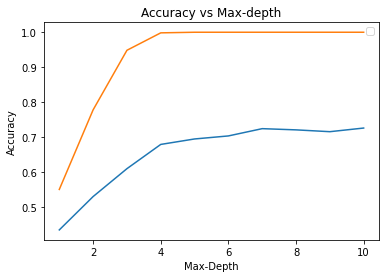

10


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(max_depth=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs Max-depth")
plt.xlabel("Max-Depth")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

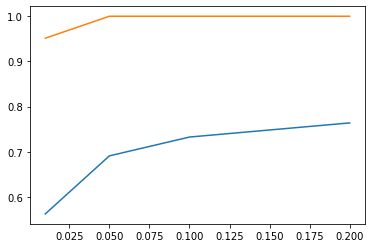

0.2


In [ ]:
L=[0.01,0.05,0.1,0.2]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(learning_rate=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

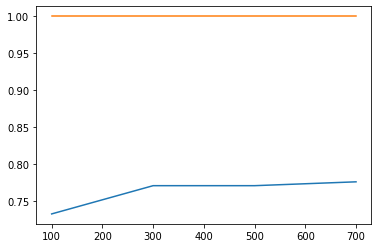

700


In [ ]:
L=[100,300,500,700]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(n_estimators=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

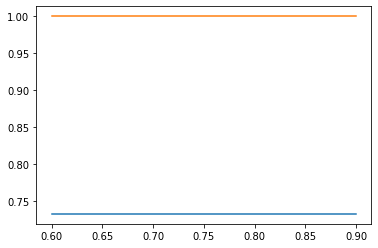

0.6


In [ ]:
L=[0.6,0.7,0.8,0.9]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(subsample=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

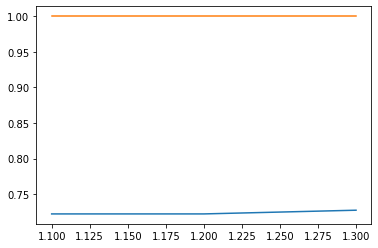

1.3


In [ ]:
L=[1.1, 1.2, 1.3]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(reg_lambda=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

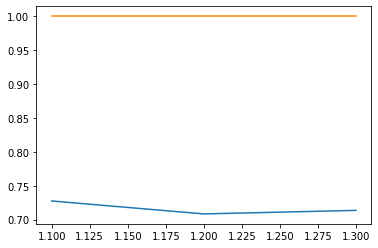

1.1


In [ ]:
L=[1.1, 1.2, 1.3]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(reg_alpha=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

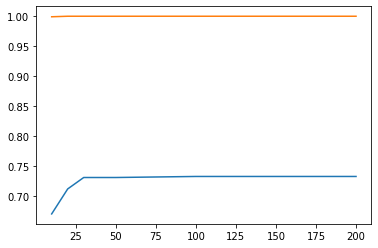

100


In [ ]:
L=[10,20,30,50, 100, 200]
grx=[]
grrx=[]
for i in L:
  clf = lgb.LGBMClassifier(num_leaves=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

###Final Model

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report as adr
clf = lgb.LGBMClassifier(reg_alpha=1.2,num_leaves=50,reg_lambda=1.2,subsample=0.6,
                         n_estimators=300,learning_rate=0.1,max_depth=7)
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))
Accdictionary2['lightgbm']=accuracy_score(ypr,y_test)

              precision    recall  f1-score   support

           1       0.49      0.69      0.57        29
           2       0.87      0.72      0.79        90
           3       0.69      0.76      0.72        74
           4       0.73      0.61      0.66        89
           5       0.82      0.87      0.84        62
           6       0.72      0.77      0.74        75
           7       0.70      0.74      0.72        84
           8       0.71      0.67      0.69        73

    accuracy                           0.73       576
   macro avg       0.71      0.73      0.72       576
weighted avg       0.73      0.73      0.73       576



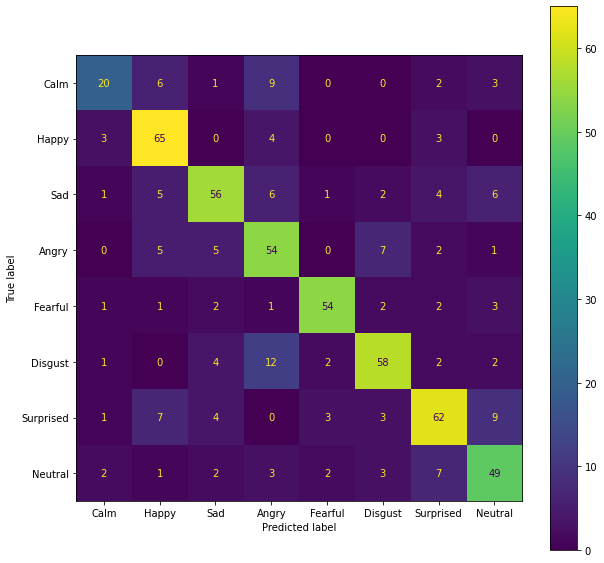

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised','Neutral'],ax=ax)
plt.show()

##Svc

###Initial Model

In [ ]:
from sklearn.svm import SVC
clf= SVC(gamma='auto')
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))

              precision    recall  f1-score   support

           1       0.49      0.87      0.62        23
           2       0.97      0.75      0.85        97
           3       0.67      0.81      0.73        67
           4       0.76      0.67      0.71        83
           5       0.85      0.86      0.85        65
           6       0.74      0.82      0.78        73
           7       0.81      0.82      0.81        88
           8       0.81      0.70      0.75        80

    accuracy                           0.78       576
   macro avg       0.76      0.79      0.76       576
weighted avg       0.80      0.78      0.78       576



###Parameter Tuning

No handles with labels found to put in legend.


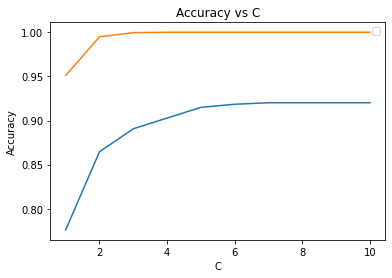

7


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf= SVC(gamma='auto', C=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs C")
plt.xlabel("C")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

No handles with labels found to put in legend.


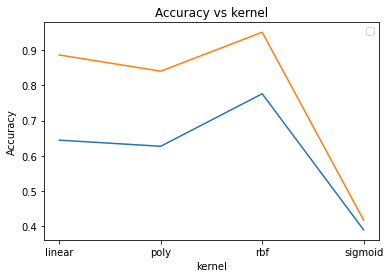

rbf


In [ ]:
L=['linear', 'poly', 'rbf', 'sigmoid']
grx=[]
grrx=[]
for i in L:
  clf= SVC(gamma='auto', kernel=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs kernel")
plt.xlabel("kernel")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

No handles with labels found to put in legend.


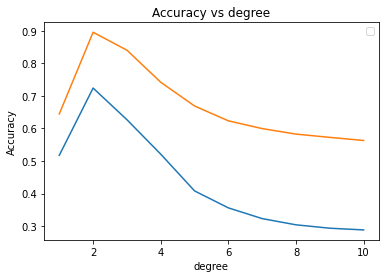

2


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf= SVC(gamma='auto',kernel='poly',degree=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs degree")
plt.xlabel("degree")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

No handles with labels found to put in legend.


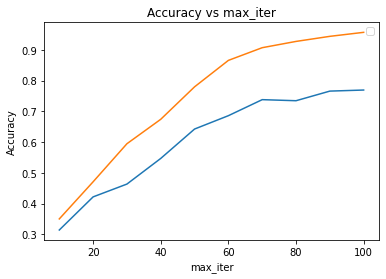

100


In [ ]:
L=[10,20,30,40,50,60,70,80,90,100]
grx=[]
grrx=[]
for i in L:
  clf= SVC(gamma='auto',max_iter=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs max_iter")
plt.xlabel("max_iter")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

###Final Model

In [ ]:
from sklearn.svm import SVC
clf= SVC(gamma='auto',max_iter=80,degree=2,kernel='rbf',C=4)
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))
Accdictionary2['Svc']=accuracy_score(ypr,y_test)

              precision    recall  f1-score   support

           1       0.76      0.65      0.70        48
           2       0.87      0.86      0.86        76
           3       0.83      0.76      0.79        88
           4       0.86      0.84      0.85        76
           5       0.91      0.90      0.90        67
           6       0.75      0.84      0.79        73
           7       0.79      0.88      0.83        80
           8       0.86      0.87      0.86        68

    accuracy                           0.83       576
   macro avg       0.83      0.82      0.82       576
weighted avg       0.83      0.83      0.83       576



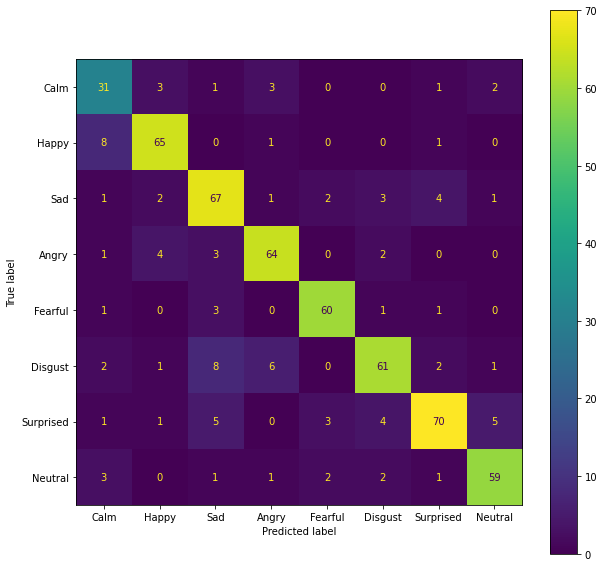

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised','Neutral'],ax=ax)
plt.show()

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))
Accdictionary2['NaiveByes Classifier']=accuracy_score(ypr,y_test)

              precision    recall  f1-score   support

           1       0.41      0.24      0.30        71
           2       0.60      0.52      0.56        87
           3       0.20      0.50      0.28        32
           4       0.16      0.36      0.22        33
           5       0.45      0.57      0.50        53
           6       0.46      0.42      0.44        88
           7       0.40      0.40      0.40        90
           8       0.71      0.40      0.51       122

    accuracy                           0.42       576
   macro avg       0.43      0.43      0.40       576
weighted avg       0.49      0.42      0.43       576



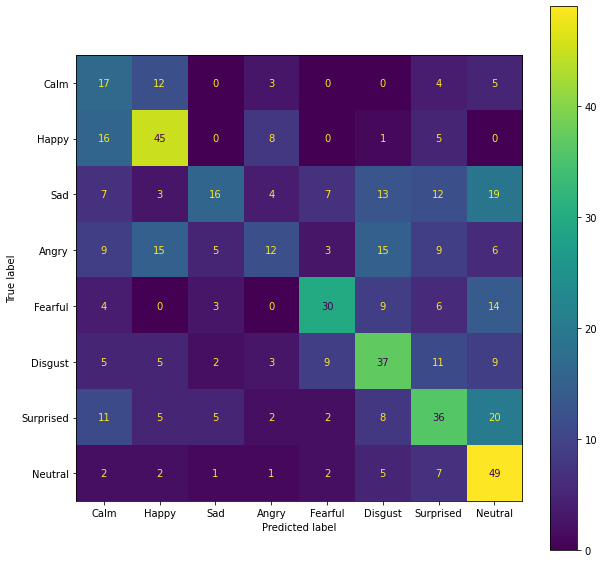

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised','Neutral'],ax=ax)
plt.show()

##RandomForest

###Initial Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=69)
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))

              precision    recall  f1-score   support

           1       0.17      0.54      0.26        13
           2       0.91      0.56      0.69       122
           3       0.67      0.77      0.72        70
           4       0.64      0.56      0.59        84
           5       0.80      0.90      0.85        59
           6       0.60      0.80      0.69        61
           7       0.74      0.73      0.73        91
           8       0.67      0.61      0.63        76

    accuracy                           0.68       576
   macro avg       0.65      0.68      0.65       576
weighted avg       0.72      0.68      0.69       576



###Parameters Tuning

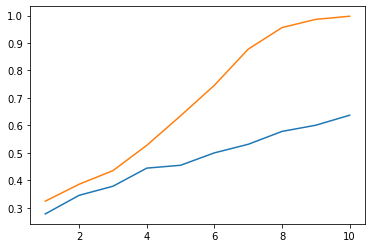

10


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = RandomForestClassifier(max_depth=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

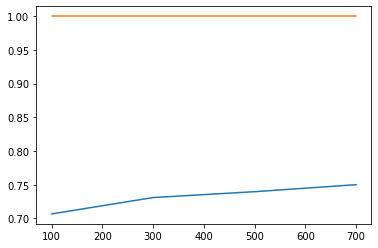

700


In [ ]:
L=[100,300,500,700]
grx=[]
grrx=[]
for i in L:
  clf = RandomForestClassifier(n_estimators=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.plot(L,grx)
plt.plot(L,grrx)
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

###Final-Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=69,n_estimators=500,max_depth=9)
clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))
Accdictionary2['RandomForest']=accuracy_score(ypr,y_test)

              precision    recall  f1-score   support

           1       0.05      0.67      0.09         3
           2       0.95      0.55      0.70       128
           3       0.60      0.83      0.70        59
           4       0.54      0.51      0.53        78
           5       0.77      0.93      0.84        55
           6       0.63      0.72      0.67        71
           7       0.67      0.66      0.67        91
           8       0.74      0.56      0.64        91

    accuracy                           0.65       576
   macro avg       0.62      0.68      0.60       576
weighted avg       0.72      0.65      0.67       576



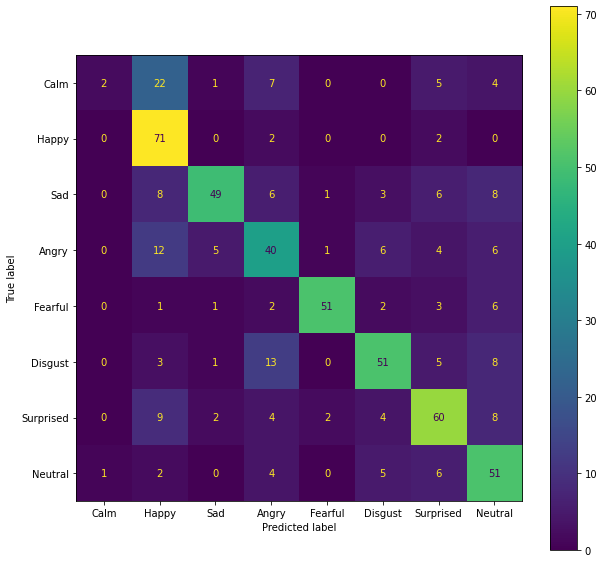

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised','Neutral'],ax=ax)
plt.show()

##DecisonTree

###Initial Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=69)

clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))

              precision    recall  f1-score   support

           1       0.24      0.30      0.27        33
           2       0.48      0.42      0.45        85
           3       0.40      0.47      0.43        68
           4       0.39      0.33      0.36        89
           5       0.74      0.61      0.67        80
           6       0.48      0.54      0.51        72
           7       0.39      0.49      0.44        71
           8       0.42      0.37      0.39        78

    accuracy                           0.45       576
   macro avg       0.44      0.44      0.44       576
weighted avg       0.46      0.45      0.45       576



###Parameter Tuning

No handles with labels found to put in legend.


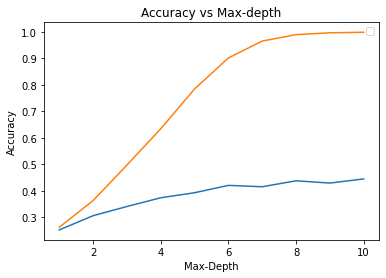

20


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = DecisionTreeClassifier(max_depth=i*2)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs Max-depth")
plt.xlabel("Max-Depth")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i]*2)
    break

No handles with labels found to put in legend.


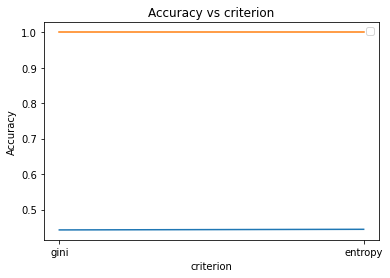

entropy


In [ ]:
L=['gini','entropy']
grx=[]
grrx=[]
for i in L:
  clf = DecisionTreeClassifier(criterion=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs criterion")
plt.xlabel("criterion")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i])
    break

No handles with labels found to put in legend.


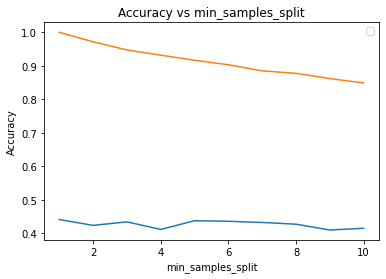

2


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = DecisionTreeClassifier(min_samples_split=i+1)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs min_samples_split")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i]+1)
    break

No handles with labels found to put in legend.


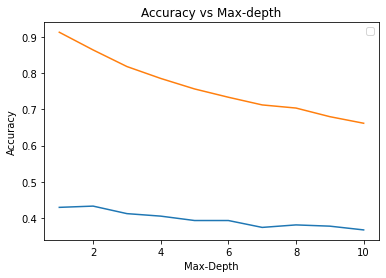

3


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = DecisionTreeClassifier(min_samples_leaf=i+1)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs Max-depth")
plt.xlabel("Max-Depth")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i]+1)
    break

No handles with labels found to put in legend.


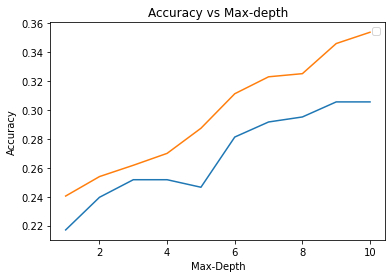

10


In [ ]:
L=[1,2,3,4,5,6,7,8,9,10]
grx=[]
grrx=[]
for i in L:
  clf = DecisionTreeClassifier(max_leaf_nodes=i+1)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  prd=clf.predict(X_train)
  grx.append(accuracy_score(y_test,y_pred))
  grrx.append(accuracy_score(y_train,prd))
plt.title("Accuracy vs Max-depth")
plt.xlabel("Max-Depth")
plt.ylabel("Accuracy")

plt.plot(L,grx)
plt.plot(L,grrx)
plt.legend()
plt.show()

for i in range(0,len(grx)):
  if(grx[i]==max(grx)):
    print(L[i]+1)
    break

###Final Model

In [ ]:
#hAARDIKPARAETERS TUNE KAR KE DAAL DIYO IDHAR
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=16,criterion='gini',min_samples_split=8,random_state=69,min_samples_leaf=2,max_leaf_nodes=6)

clf.fit(X_train, y_train)

ypr=clf.predict(X_test)
print(adr(ypr,y_test))
Accdictionary2['Decison Tree']=accuracy_score(ypr,y_test)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.61      0.32      0.42       146
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.38      0.64      0.48        39
           6       0.11      0.30      0.16        30
           7       0.00      0.00      0.00         0
           8       0.90      0.17      0.29       361

    accuracy                           0.25       576
   macro avg       0.25      0.18      0.17       576
weighted avg       0.75      0.25      0.33       576



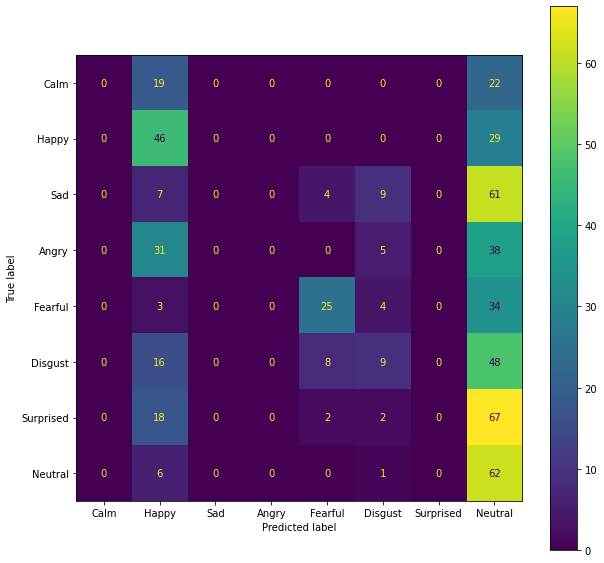

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised','Neutral'],ax=ax)
plt.show()

##MLP Classifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),
                    activation="relu",random_state=1).fit(X_train, y_train)
ypr=clf.predict(X_test)
print(adr(ypr,y_test))
Accdictionary2['MLP']=accuracy_score(ypr,y_test)

              precision    recall  f1-score   support

           1       0.56      0.64      0.60        36
           2       0.89      0.83      0.86        81
           3       0.74      0.82      0.78        73
           4       0.78      0.76      0.77        76
           5       0.95      0.91      0.93        69
           6       0.81      0.88      0.85        75
           7       0.83      0.83      0.83        89
           8       0.83      0.74      0.78        77

    accuracy                           0.81       576
   macro avg       0.80      0.80      0.80       576
weighted avg       0.82      0.81      0.81       576



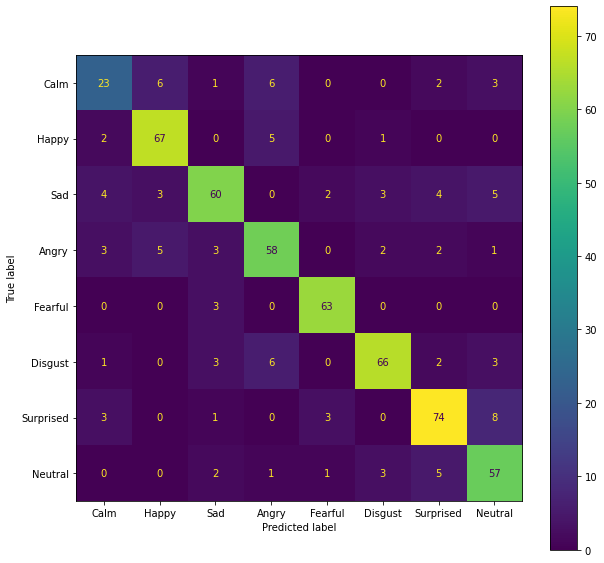

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised','Neutral'],ax=ax)
plt.show()

##LSTM-Model

In [ ]:
XLSTM = [x for x in X]
XLSTM = np.array(X)
XLSTM.shape
XLSTM = np.expand_dims(XLSTM, -1)
XLSTM.shape

(2880, 128, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onc = OneHotEncoder()
Y = onc.fit_transform(Data[['Emotion']])

Y = Y.toarray()
Y.shape


(2880, 8)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(128,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='softmax'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='softmax'),

])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [ ]:
history = model.fit(X, Y,  batch_size=30,validation_split=0.2, epochs=50)

Epoch 1/50
77/77 [==============================] - 10s 49ms/step - loss: 2.0745 - accuracy: 0.1259 - val_loss: 2.0661 - val_accuracy: 0.1372
Epoch 2/50
77/77 [==============================] - 3s 38ms/step - loss: 2.0704 - accuracy: 0.1315 - val_loss: 2.0641 - val_accuracy: 0.1337
Epoch 3/50
77/77 [==============================] - 3s 38ms/step - loss: 2.0675 - accuracy: 0.1376 - val_loss: 2.0615 - val_accuracy: 0.1319
Epoch 4/50
77/77 [==============================] - 3s 38ms/step - loss: 2.0678 - accuracy: 0.1306 - val_loss: 2.0602 - val_accuracy: 0.1302
Epoch 5/50
77/77 [==============================] - 3s 38ms/step - loss: 2.0664 - accuracy: 0.1233 - val_loss: 2.0603 - val_accuracy: 0.1319
Epoch 6/50
77/77 [==============================] - 3s 38ms/step - loss: 2.0657 - accuracy: 0.1315 - val_loss: 2.0604 - val_accuracy: 0.1319
Epoch 7/50
77/77 [==============================] - 3s 38ms/step - loss: 2.0684 - accuracy: 0.1241 - val_loss: 2.0604 - val_accuracy: 0.1319
Epoch 8/50
7

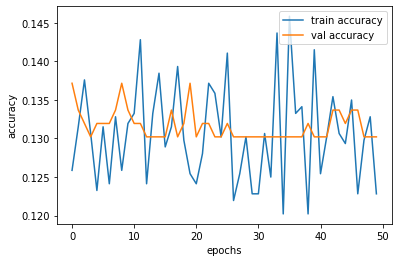

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#Comparison B/W Models(Augmneted)

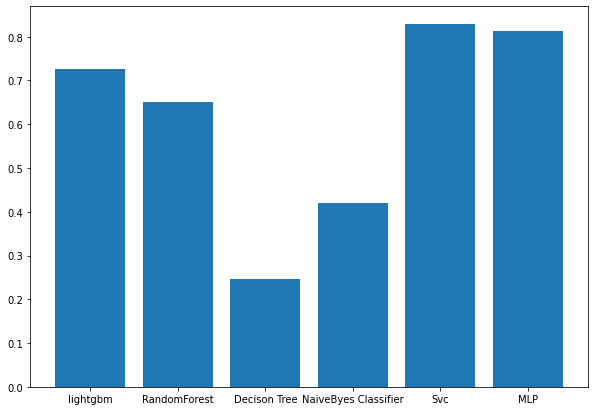

In [ ]:
plt.figure(figsize=(10, 7))
plt.bar(range(len(Accdictionary2)), list(Accdictionary2.values()), align='center')
plt.xticks(range(len(Accdictionary2)), list(Accdictionary2.keys()))
plt.show()

#Comparisom B/w two approaches

In [ ]:
Accdictionary2

{'Decison Tree': 0.2465277777777778,
 'MLP': 0.8125,
 'NaiveByes Classifier': 0.4201388888888889,
 'RandomForest': 0.6510416666666666,
 'Svc': 0.828125,
 'lightgbm': 0.7256944444444444}

In [ ]:
Accdictionary

{'Decison Tree': 0.2777777777777778,
 'MLP': 0.5694444444444444,
 'NaiveByes Classifier': 0.4270833333333333,
 'RandomForest': 0.5416666666666666,
 'Svc': 0.5416666666666666,
 'lightgbm': 0.625}

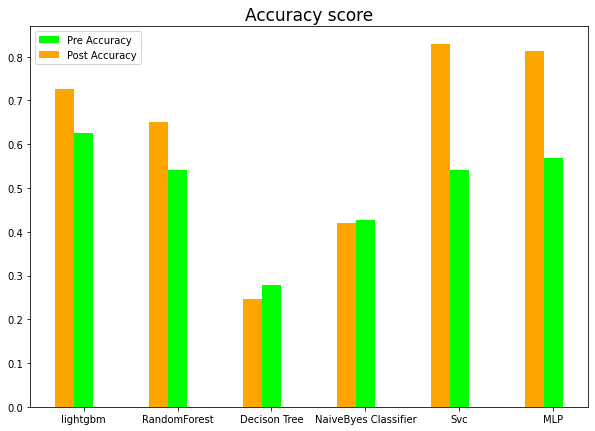

In [ ]:
plt.figure(figsize=(10, 7))
X = np.arange(len(Accdictionary))
ax = plt.subplot(111)
ax.bar(X, Accdictionary.values(), width=0.2, color='#00FF00', align='center')
ax.bar(X-0.2, Accdictionary2.values(), width=0.2, color='#FFA500', align='center')
ax.legend(('Pre Accuracy','Post Accuracy'))
plt.xticks(X, Accdictionary.keys())
plt.title("Accuracy score", fontsize=17)
plt.show()


In [ ]:
print(Accdictionary.keys())

dict_keys(['lightgbm', 'RandomForest', 'Decison Tree', 'NaiveByes Classifier', 'Svc', 'MLP'])


In [ ]:
colm=['Models']
for i in Accdictionary.keys():
  colm.append(i)
lxr=['Data before Augmentation']
lxy=['Data after Augmentation']
for i in Accdictionary.keys():
  lxr.append(Accdictionary[i])
  lxy.append(Accdictionary2[i])

dfd=[lxr,lxy]

comp=pd.DataFrame(dfd, columns=colm)
comp

,Models,lightgbm,RandomForest,Decison Tree,NaiveByes Classifier,Svc,MLP
0,Data before Augmentation,0.625000,0.541667,0.277778,0.427083,0.541667,0.569444
1,Data after Augmentation,0.725694,0.651042,0.246528,0.420139,0.828125,0.812500


#Flask Code

In [ ]:
class SpeechEmotionRecognition:
  def __init__(self,filename,n_mfcc):
    self.filename=filename
    self.n_mfcc=n_mfcc

  def ExtractFeatures(self):
    self.y, self.samplingrate = librosa.load(self.filename, duration=3, offset=0.5)
    self.mfcc = np.mean(librosa.feature.mfcc(y=self.y, sr=self.samplingrate, n_mfcc=self.n_mfcc).T, axis=0)
    self.mfcc=np.array(self.mfcc)







In [ ]:
filename='/content/gdrive/MyDrive/Prml-Project/Actor_01/03-01-01-01-01-01-01.wav'
n_mfcc=128
obj=SpeechEmotionRecognition(filename,n_mfcc)
obj.ExtractFeatures()

In [ ]:
z=obj.mfcc
z.shape
ypr=clf.predict([z])
ypr

array([2])

In [ ]:
ypr=clf.predict(X_test)

In [ ]:
clf

LGBMClassifier(learning_rate=0.05, max_depth=5, n_estimators=400, num_leaves=30,
               reg_alpha=1.2, reg_lambda=1.2, subsample=0.8)

In [ ]:
import joblib
joblib.dump(clf, 'lgb.pkl')

In [ ]:
import pickle
with open('model_pickle','wb') as f:
  pickle.dump(clf,f)

In [ ]:
with open('model_pickle','rb') as f:
  y=pickle.load(f)